# Set Up

In [1]:
import gensim#For word2vec, etc
from gensim.models import ldaseqmodel

import lucem_illud_2020

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import scipy
import matplotlib
import matplotlib.pyplot as plt #For graphics
import wordcloud
import seaborn as sns #makes our plots look nicer

from sklearn.cluster import KMeans
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

import nltk
from nltk.collocations import *

import networkx as nx
import copy

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import re
import string
import os #For looking through files
import os.path #For managing file paths

## Load Data

In [2]:
data = pd.read_pickle("data/coca_data_normalized.pkl")

In [3]:
data.genre.unique()

array(['MAG', 'SPOK', 'NEWS'], dtype=object)

In [4]:
#5-year periods
def get_period(year, startyr, endyr, n=5):
    period_start = []
    for i in range(startyr, endyr+1, n):
        period_start.append(i)
    for index, p in enumerate(period_start):
        if year >= p:
            period = index
            continue
        else:
            break
    return period  
    
data['period'] = data['year'].apply(lambda x: get_period(x, 1991, 2015, n=5) if x>=1991 else 0)

## Labelling Ideology

In [5]:
unique_sources = list(data.source.apply(lambda x: re.split("_|: | ", x)[0]).unique())
len(unique_sources)

109

In [6]:
# Write a function that let us conveniently label ideology: Left, Neutral, Right
media_ideology = {}
remaining_media = unique_sources.copy()

def label_ideology(media_title, ideology, media_ideology = media_ideology):
    media_ideology[media_title] = ideology
    remaining_media.remove(media_title)

In [7]:
label_ideology('Money', 'Neutral')
label_ideology('MotherEarth', 'Neutral')
label_ideology('MotherJones', 'Left')
label_ideology('AmHeritage', 'Neutral')
label_ideology('AmSpect', 'Right')
label_ideology('Forbes', 'Right')
label_ideology('NatlReview', 'Right')
label_ideology('Newsweek', 'Left')
label_ideology('ScienceNews', 'Neutral')
label_ideology('Smithsonian', 'Neutral')
label_ideology('USNWR', 'Left')
label_ideology('WashMonth', 'Left')
label_ideology('ChangingTimes', 'Right')
label_ideology('HistoryToday', 'Neutral')
label_ideology('Omni', 'Neutral')
label_ideology('Wilderness', 'Neutral')
label_ideology('TIME', 'Left')
label_ideology('NatlParks', 'Neutral')
label_ideology('AmerArtist', 'Neutral')
label_ideology('RollingStone', 'Left')
label_ideology('Americas', 'Neutral')
label_ideology('SportsIll', 'Neutral')
label_ideology('Ms', 'Left')
label_ideology('PopScience', 'Neutral')
label_ideology('Futurist', 'Neutral')
label_ideology('HarpersMag', 'Left')
label_ideology('Fortune', 'Right')
label_ideology('USAToday', 'Left')
label_ideology('America', 'Left')
label_ideology('ChristCentury', 'Right')
label_ideology('People', 'Left')
label_ideology('Jet', 'Left')
label_ideology('Aging', 'Neutral')
label_ideology('Horticulture', 'Neutral')
label_ideology('NewRepublic', 'Left')
label_ideology('Conservation', 'Left')
label_ideology('NaturalHist', 'Neutral')
label_ideology('Atlantic', 'Left')
label_ideology('Inc.', 'Neutral')
label_ideology('ChildrenToday', 'Neutral')
label_ideology('Ebony', 'Left')
label_ideology('ConsumResrch', 'Neutral')
label_ideology('SatEvenPost', 'Neutral')
label_ideology('ChristToday', 'Right')
label_ideology('Backpacker', 'Neutral')
label_ideology('AmericanCraft', 'Neutral')
label_ideology('ArtAmerica', 'Neutral')
label_ideology('SportingNews', 'Neutral')
label_ideology('MensHealth', 'Neutral')
label_ideology('Antiques', 'Neutral')
label_ideology('Parenting', 'Neutral')
label_ideology('Essence', 'Neutral')
label_ideology('Environmental', 'Neutral')
label_ideology('USCatholic', 'Right')
label_ideology('MilitaryHist', 'Neutral')
label_ideology('PsychToday', 'Neutral')
label_ideology('Cosmopolitan', 'Left')
label_ideology('Redbook', 'Neutral')
label_ideology('Bazaar', 'Left')
label_ideology('ChildDigest', 'Neutral')
label_ideology('Bicycling', 'Neutral')
label_ideology('Shape', 'Neutral')
label_ideology('NatGeog', 'Neutral')
label_ideology('Entertainment', 'Neutral')
label_ideology('Astronomy', 'Neutral')
label_ideology('TownCountry', 'Neutral')
label_ideology('TotalHealth', 'Neutral')
label_ideology('Esquire', 'Left')
label_ideology('FieldStream', 'Neutral')
label_ideology('TechReview', 'Neutral')
label_ideology('CountryLiving', 'Neutral')
label_ideology('VegTimes', 'Neutral')
label_ideology('SouthernLiv', 'Neutral')
label_ideology('Skiing', 'Neutral')
label_ideology('ConsumRep', 'Neutral')
label_ideology('Sunset', 'Neutral')
label_ideology('HarpersBazaar', 'Neutral')
label_ideology('AmericanSpectator', 'Right')
label_ideology('GoodHousekeeping', 'Neutral')
label_ideology('PopMech', 'Neutral')
label_ideology('MHQTheQuarterly', 'Neutral')
label_ideology('TodaysParent', 'Neutral')
label_ideology('NationalGeographic', 'Neutral')
label_ideology('EEnvironmental', 'Neutral')
label_ideology('ParentingEarly', 'Neutral')
label_ideology('ABC', 'Left')
label_ideology('CNN', 'Left')
label_ideology('PBS', 'Left')
label_ideology('CBS', 'Left')
label_ideology('Ind', 'Left')
label_ideology('NPR', 'Left')
label_ideology('NBC', 'Left')
label_ideology('Fox', 'Right')
label_ideology('MSNBC', 'Left')
label_ideology('NYTimes', 'Left')
label_ideology('CSMonitor', 'Neutral')
label_ideology('AssocPress', 'Neutral')
label_ideology('WashPost', 'Left')
label_ideology('SanFranChron', 'Left')
label_ideology('Atlanta', 'Neutral')
label_ideology('Houston', 'Neutral')
label_ideology('Chicago', 'Neutral')
label_ideology('Denver', 'Left')
label_ideology('GolfMag', 'Neutral')
label_ideology('NewStatesman', 'Left')
label_ideology('Austin', 'Left')
label_ideology('STLouis', 'Neutral')
label_ideology('Pittsburgh', 'Neutral')
label_ideology('OrangeCR', 'Neutral')

In [8]:
media_ideology

{'Money': 'Neutral',
 'MotherEarth': 'Neutral',
 'MotherJones': 'Left',
 'AmHeritage': 'Neutral',
 'AmSpect': 'Right',
 'Forbes': 'Right',
 'NatlReview': 'Right',
 'Newsweek': 'Left',
 'ScienceNews': 'Neutral',
 'Smithsonian': 'Neutral',
 'USNWR': 'Left',
 'WashMonth': 'Left',
 'ChangingTimes': 'Right',
 'HistoryToday': 'Neutral',
 'Omni': 'Neutral',
 'Wilderness': 'Neutral',
 'TIME': 'Left',
 'NatlParks': 'Neutral',
 'AmerArtist': 'Neutral',
 'RollingStone': 'Left',
 'Americas': 'Neutral',
 'SportsIll': 'Neutral',
 'Ms': 'Left',
 'PopScience': 'Neutral',
 'Futurist': 'Neutral',
 'HarpersMag': 'Left',
 'Fortune': 'Right',
 'USAToday': 'Left',
 'America': 'Left',
 'ChristCentury': 'Right',
 'People': 'Left',
 'Jet': 'Left',
 'Aging': 'Neutral',
 'Horticulture': 'Neutral',
 'NewRepublic': 'Left',
 'Conservation': 'Left',
 'NaturalHist': 'Neutral',
 'Atlantic': 'Left',
 'Inc.': 'Neutral',
 'ChildrenToday': 'Neutral',
 'Ebony': 'Left',
 'ConsumResrch': 'Neutral',
 'SatEvenPost': 'Neutral',

In [9]:
#add political leaning label
def add_ideology(x, media_ideology=media_ideology):
    try_split = re.split("_|: | ",x)
    if len(try_split)>1:
        x = try_split[0]
    if x in media_ideology:
        return media_ideology[x]
    else:
        print('{} does not exists'.format(x))

data["ideology"] = data['source'].apply(add_ideology)

In [10]:
data.groupby(['ideology','period']).size()

ideology  period
Left      0         839
          1         471
          2         480
          3         313
          4         381
Neutral   0         326
          1         220
          2         238
          3         216
          4         259
Right     0          57
          1          37
          2          48
          3          35
          4          72
dtype: int64

In [11]:
data_left=data[data['ideology']=='Left'].reset_index()
data_right=data[data['ideology']=='Right'].reset_index()

In [12]:
data_left.head()

,index,text_id,text,word_count,year,genre,source,title,publication_info,tokenized_words,normalized_words,normalized_words_POS,tokenized_sents,normalized_sents,period,ideology
0,3,2019061,section : movements from socialist to republi...,1754,1990,MAG,MotherJones,Serve the people.,"Vol. 15 Issue 5, p18, 3p, 1 illustration\r\n","[section, movements, from, socialist, to, repu...","[section, movement, socialist, republicans, ge...","[( , _SP), (section, NN), (:, :), (movements, ...","[[section], [movements, from, socialist, to, r...","[[section], [movement, socialist, republicans,...",0,Left
1,4,2019063,inside a dusty cement-block house with worn ...,6032,1990,MAG,MotherJones,No road to Tahuanti.,"Vol. 15 Issue 5, p36, 11p, 8bw\r\n","[inside, a, dusty, cement, block, house, with,...","[inside, dusty, cement, block, house, wear, li...","[( , _SP), (inside, IN), (a, DT), (dusty, JJ)...","[[inside, a, dusty, cement, block, house, with...","[[inside, dusty, cement, block, house, wear, l...",0,Left
2,19,2020023,section : international europe braces for imm...,1148,1990,MAG,Newsweek,Winter wanderers.,"Vol. 116 Issue 25, p34, 3p, 5c\r\n","[section, international, europe, braces, for, ...","[section, international, europe, brace, immigr...","[( , _SP), (section, NN), (:, :), (internation...","[[section, international, europe, braces, for,...","[[section, international, europe, brace, immig...",0,Left
3,20,2020071,section : special report if the sanctions do...,1748,1990,MAG,Newsweek,Will they hold?,"Vol. 116 Issue 13, p20, 4p, 3c\r\n","[section, special, report, if, the, sanctions,...","[section, special, report, sanction, push, sad...","[( , _SP), (section, NN), (:, :), (special, JJ...","[[section, special, report, if, the, sanctions...","[[section, special, report, sanction, push, sa...",0,Left
4,21,2020081,section : society up to now the imagery of e...,2928,1990,MAG,Newsweek,America's changing face.,"Vol. 116 Issue 11, p46, 5p, 6c, 1bw\r\n","[section, society, up, to, now, the, imagery, ...","[section, society, imagery, ellis, island, str...","[( , _SP), (section, NN), (:, :), (society, NN...","[[section, society, up, to, now, the, imagery,...","[[section, society, imagery, ellis, island, st...",0,Left


In [13]:
data_right.head()

,index,text_id,text,word_count,year,genre,source,title,publication_info,tokenized_words,normalized_words,normalized_words_POS,tokenized_sents,normalized_sents,period,ideology
0,6,2019377,even if saddam hussein fails to get his way ...,1830,1990,MAG,AmSpect,House of ghosts.,"Vol. 23 Issue 12, p19, 3p, 1 illustration\r\n","[even, if, saddam, hussein, fails, to, get, hi...","[saddam, hussein, fail, way, kuwait, exist, au...","[( , _SP), (even, RB), (if, IN), (saddam, NNP...","[[even, if, saddam, hussein, fails, to, get, h...","[[saddam, hussein, fail, way, kuwait, exist, a...",0,Right
1,7,2019393,section : spectator 's journal dateline : li...,2825,1990,MAG,AmSpect,Mission to Malawi.,"Vol. 23 Issue 9, p24, 3p, 2 illustrations\r\n","[section, spectator, 's, journal, dateline, li...","[section, spectator, journal, dateline, lilong...","[( , _SP), (section, NN), (:, :), (spectator, ...","[[section, spectator, 's, journal, dateline, l...","[[section, spectator, journal, dateline, lilon...",0,Right
2,8,2019402,soviet jewry is giving israel new life -- bu...,2892,1990,MAG,AmSpect,Israel and the great exodus.,"Vol. 23 Issue 7, p18, 3p, 1 illustration\r\n","[soviet, jewry, is, giving, israel, new, life,...","[soviet, jewry, give, israel, new, life, kind,...","[( , _SP), (soviet, JJ), (jewry, NNS), (is, V...","[[soviet, jewry, is, giving, israel, new, life...","[[soviet, jewry, give, israel, new, life, kind...",0,Right
3,9,2019416,"larry agran , a jane fonda in tom hayden clo...",7301,1990,MAG,AmSpect,"The evil emperor of Irvine, California.","Vol. 23 Issue 5, p22, 6p, 5 illustrations\r\n","[larry, agran, a, jane, fonda, in, tom, hayden...","[larry, agran, jane, fonda, tom, hayden, cloth...","[( , _SP), (larry, NNP), (agran, NNP), (,, ,)...","[[larry, agran, a, jane, fonda, in, tom, hayde...","[[larry, agran, jane, fonda, tom, hayden, clot...",0,Right
4,10,2019429,section : congress in crisis they undercut t...,7126,1990,MAG,AmSpect,The Prince Metternichs of Congress. (cover story),"Vol. 23 Issue 2, p22, 6p, 4 illustrations\r\n","[section, congress, in, crisis, they, undercut...","[section, congress, crisis, undercut, presiden...","[( , _SP), (section, NN), (:, :), (congress, N...","[[section, congress, in, crisis], [they, under...","[[section, congress, crisis], [undercut, presi...",0,Right


In [14]:
data=data_right

## Additional stopwords

In [15]:
names=[]
for word in data[data.genre=='SPOK']['text'].sum().split():
    if word.startswith('!') or word.endswith('#'):
        word = word.translate(str.maketrans('', '', string.punctuation))
        names.append(word)
names

['crier',
 'richardholbrooke',
 'crier',
 'holbrooke',
 'crier',
 'holbrooke',
 'crier',
 'holbrooke',
 'crier',
 'holbrooke',
 'crier',
 'holbrooke',
 'crier',
 'holbrooke',
 'crier',
 'clinton',
 'crier',
 'holbrooke',
 'crier',
 'holbrooke',
 'crier',
 'holbrooke',
 'crier',
 'holbrooke',
 'crier',
 'crier',
 'crier',
 'holbrooke',
 'holbrooke',
 'crier',
 'holbrooke',
 'crier',
 'holbrooke',
 'crier',
 'holbrooke',
 'crier',
 'holbrooke',
 'crier',
 'holbrooke',
 'pemmaraju',
 'welcomenicetoha',
 'cristinasaralegui',
 'pemmaraju',
 'saralegui',
 'pemmaraju',
 'saralegui',
 'pemmaraju',
 'saralegui',
 'pemmaraju',
 'saralegui',
 'pemmaraju',
 'saralegui',
 'pemmaraju',
 'saralegui',
 'pemmaraju',
 'saralegui',
 'pemmaraju',
 'pemmaraju',
 'saralegui',
 'pemmaraju',
 'saralegui',
 'pemmaraju',
 'saralegui',
 '',
 '',
 'pemmaraju',
 'saralegui',
 '',
 'pemmaraju',
 'saralegui',
 'pemmaraju',
 'saralegui',
 'pemmaraju',
 'saralegui',
 'pemmaraju',
 'saralegui',
 'pemmaraju',
 'saralegu

In [16]:
#Frequency Distribution
fdist = nltk.FreqDist([w for w in data['normalized_words'].sum()])
freq = pd.DataFrame.from_dict(fdist, orient='index', columns=['count'])
freq = freq.sort_values(by='count', ascending=False)
freq[:50]

,count
say,2355
people,2228
know,1882
go,1819
right,1606
think,1586
year,1543
time,1467
like,1461
come,1413


In [17]:
# remove frequent common words, stop at child
stopwords = freq.index[:38]

In [18]:
# remove top common verbs
freqdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in data['normalized_words_POS'].sum())
topverbs = freqdist_POStoWord['VB'].most_common(50) # stop at protect
stopwords_verbs = [v for v,count in topverbs]

In [21]:
others=['qwq', 'voice-over', 'voiceover','>','+', 'end', 'video', 'clip', 'morning', 'tonight', 'news', 'ms', 
        'mrs', 'mr','s','voice', 'thank', 'watching', 'have', 'good', 'evening', 'weekend', 'night', 'yes', 
        'lot', 'long']
# get rid of other words that are not relevant

stopwords_all=set(stopwords).union(set(stopwords_verbs),set(others), set(names))

#  useful words that we may not want to remove
for r in ['american', 'israel', 'muslim', 'refugee', 'citizen', 'man', 'woman', 'girl', 'boy', 'demonstrators']:
    if r in stopwords_all:
        stopwords_all.remove(r) 

In [22]:
len(stopwords_all)

1034

In [23]:
stopwords_all

{'',
 'drbrobsonlutz',
 'get',
 'johnhuddy',
 'walker',
 'owens',
 'lydiadavenport',
 'government',
 'danielgilleonat',
 'kirstenpowers',
 'margaretharding',
 'okanotherintere',
 'danhenningercol',
 'jasmine',
 'josephkassabcha',
 'brianwilliams',
 'dickmorris',
 'barryscanlonfor',
 'kghasbeenfollo',
 'daftari',
 'jensen',
 'pittman',
 'govscottwalker',
 'josephmontville',
 'mikigoldwasserm',
 'colmes',
 'davidaxelrod',
 'mccainwecangoi',
 'gutfeldholdon',
 'obenshain',
 'barnes',
 'crowley',
 'revalsharptonc',
 'salzman',
 'angle',
 'paulryan1rwi',
 'say',
 'andrewshoenholtz',
 'claudiasmithatt',
 'gilliam',
 'actor',
 'scottrasmussenp',
 'thank',
 'jeffzelenythen',
 'mcfarland',
 'gregkellyfoxne',
 'mrlewthepresid',
 'at',
 'tomruskinsecuri',
 'yes',
 're',
 'nfl',
 'rice',
 'nancypelosi',
 'haroldford1d2',
 'tamaraholder',
 'paisleysinging',
 'burke1oncamera',
 'okmrpittmanwe',
 'johngibsonfoxn',
 'victorianulands',
 'zarif',
 'carrieunderwood',
 'repmikecastle',
 'country',
 'mrs',

In [24]:
# remove all these additional stopwords
def more_stopwords(word_list, stopwords):
    normalized = []
    for w in word_list:
        if w not in stopwords and not w.isnumeric():
            normalized.append(w)
    return normalized

def more_stopwords_POS(word_list_POS, stopwords):
    normalized = []
    for w,p in word_list_POS:
        if w not in stopwords and not w.isnumeric():
            normalized.append((w,p))
    return normalized

data['normalized_words'] = data['normalized_words'].apply(lambda x: more_stopwords(x, stopwords_all))
data['normalized_words_POS'] = data['normalized_words_POS'].apply(lambda x: more_stopwords_POS(x, stopwords_all))
data['normalized_sents'] = data['tokenized_sents'].apply(lambda x: [more_stopwords(lucem_illud_2020.normalizeTokens(s), stopwords_all) for s in x])

In [25]:
# For Topic Models
data_vectoriser = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
dataVects = data_vectoriser.fit_transform(data['text'])
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

data['reduced_tokens'] = data['normalized_words'].apply(lambda x: dropMissing(x, data_vectoriser.vocabulary_.keys()))

In [26]:
data.head()

,index,text_id,text,word_count,year,genre,source,title,publication_info,tokenized_words,normalized_words,normalized_words_POS,tokenized_sents,normalized_sents,period,ideology,reduced_tokens
0,6,2019377,even if saddam hussein fails to get his way ...,1830,1990,MAG,AmSpect,House of ghosts.,"Vol. 23 Issue 12, p19, 3p, 1 illustration\r\n","[even, if, saddam, hussein, fails, to, get, hi...","[saddam, hussein, fail, kuwait, exist, august,...","[( , _SP), (even, RB), (if, IN), (saddam, NNP...","[[even, if, saddam, hussein, fails, to, get, h...","[[saddam, hussein, fail, kuwait, exist, august...",0,Right,"[saddam, kuwait, lose, send, population, resis..."
1,7,2019393,section : spectator 's journal dateline : li...,2825,1990,MAG,AmSpect,Mission to Malawi.,"Vol. 23 Issue 9, p24, 3p, 2 illustrations\r\n","[section, spectator, 's, journal, dateline, li...","[section, spectator, journal, dateline, lilong...","[( , _SP), (section, NN), (:, :), (spectator, ...","[[section, spectator, 's, journal, dateline, l...","[[section, spectator, journal, dateline, lilon...",0,Right,"[saturday, information, center, week, big, out..."
2,8,2019402,soviet jewry is giving israel new life -- bu...,2892,1990,MAG,AmSpect,Israel and the great exodus.,"Vol. 23 Issue 7, p18, 3p, 1 illustration\r\n","[soviet, jewry, is, giving, israel, new, life,...","[soviet, jewry, israel, life, kind, life, witt...","[( , _SP), (soviet, JJ), (jewry, NNS), (is, V...","[[soviet, jewry, is, giving, israel, new, life...","[[soviet, jewry, israel, life, kind, life], [w...",0,Right,"[soviet, israel, kind, price, jewish, wo, isra..."
3,9,2019416,"larry agran , a jane fonda in tom hayden clo...",7301,1990,MAG,AmSpect,"The evil emperor of Irvine, California.","Vol. 23 Issue 5, p22, 6p, 5 illustrations\r\n","[larry, agran, a, jane, fonda, in, tom, hayden...","[larry, agran, jane, fonda, tom, hayden, cloth...","[( , _SP), (larry, NNP), (agran, NNP), (,, ,)...","[[larry, agran, a, jane, fonda, in, tom, hayde...","[[larry, agran, jane, fonda, tom, hayden, clot...",0,Right,"[win, follow, california, wing, mayor, irvine,..."
4,10,2019429,section : congress in crisis they undercut t...,7126,1990,MAG,AmSpect,The Prince Metternichs of Congress. (cover story),"Vol. 23 Issue 2, p22, 6p, 4 illustrations\r\n","[section, congress, in, crisis, they, undercut...","[section, congress, crisis, undercut, leadersh...","[( , _SP), (section, NN), (:, :), (congress, N...","[[section, congress, in, crisis], [they, under...","[[section, congress, crisis], [undercut, leade...",0,Right,"[congress, crisis, leadership, foreign, policy..."


# Analysis 

## 1. What are the immediate context words of refugees?

In [27]:
periods = data['period'].unique()
periods

array([0, 1, 2, 3, 4])

In [28]:
for p in periods:
    chunk = data[data['period']==p]
    post_text = nltk.Text(chunk['tokenized_words'].sum())
    index = nltk.text.ConcordanceIndex(post_text) 
    print(p)
    index.print_concordance('refugee', lines=10) # usually used as adj
    index.print_concordance('refugees', lines=10) # usually used as noun
    print()
    print('similar')
    post_text.similar('refugee', num=20)
    # find other words which appear in the same contexts as the specified word; most similar first
    print()
    print('common context')
    post_text.common_contexts(['refugee'], num=20)
    # find contexts where the specified words appear; list most frequent common contexts first.
    print()

0
Displaying 10 of 93 matches:
ople creating a massive and complex refugee problem half a million saudis egypt
tuation is of particular concern to refugee organizations if baghdad succeeds i
 an unusual briefing on the kuwaiti refugee dilemma and the palestinian aspect 
no one knows how many soviet jewish refugee immigrants will finally come in par
at they had better shut down contra refugee camps before michael dukakis became
d cutting why not the fanjuls are a refugee family he says the economy of the c
ttee on the panama canal the aid to refugee chinese intellectuals among the bet
ms fell over themselves to hire any refugee from drexel 's corporate finance de
e fights in the hallways vietnamese refugee just three years in minnesota is of
l armed saddam remains in power the refugee situation is still smoldering the s
Displaying 10 of 122 matches:
ctober after interviewing scores of refugees in the region amnesty international
king in kuwait as domestic servants refugees who have surv

break day lot bit country child choice terrorist budget recession
humanitarian way border big man week woman friend building hero

common context
from_programs traumatized_for a_like to_flocks every_we iraqi_artist
as_lay near_camps the_camp this_camp a_from palestinian_camp the_camps
a_pastor growing_population for_iraqi jordan_emergency many_families
the_crisis many_churches



In [29]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

def posCooccurrence(sentences, *posType, makeMatrix = False):
    words = set()
    reducedSents = []
    #Only using the first kind of POS for each word
    wordsMap = {}
    for sent in sentences:
        s = [(w, t) for w, t in lucem_illud_2020.spacy_pos(sent) if t in posType]
        for w, t in s:
            if w not in wordsMap:
                wordsMap[w] = t
        reducedSent = [w for w, t in s]
        words |= set(reducedSent)
        reducedSents.append(reducedSent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in reducedSents:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        for w in g.nodes:
            g.nodes[w]['bipartite'] = wordsMap[w]
        return g

def plot_word_graph(graph):
    layout = nx.spring_layout(graph, weight='weight', iterations= 100)
    fig, ax = plt.subplots(figsize = (10,10))
    nx.draw(graph, ax = ax, pos = layout, labels = {n:n for n in graph.nodes()},
            width=.2, 
            alpha = .9, 
            node_size = 100,
            node_color = "xkcd:light red",
            edge_color='xkcd:black')

def plot_word_centrality(g):
    layout_nn = nx.spring_layout(g, weight='weight', iterations= 100)
    fig, ax = plt.subplots(figsize = (10,10))
    centralities_nn = nx.eigenvector_centrality(g)
    maxC = max(centralities_nn.items(), key = lambda x : x[1])[1]
    #maxWeight = max((d['weight'] for n1, n2, d in g.edges(data = True)))
    #minWeight = min((d['weight'] for n1, n2, d in g.edges(data = True)))
    nx.draw(g, ax = ax, pos = layout_nn, labels = {n: n for n in g.nodes()},
            #width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in gNN.edges(data = True)], 
            alpha = .9, 
            node_color = [centralities_nn[n] / maxC for n in g.nodes],
            node_size = [centralities_nn[n] / maxC * 100 for n in g.nodes],
            font_size = 16,
            font_color = 'xkcd:dark grey',
            edge_color = 'xkcd:medium blue',
            cmap = plt.get_cmap('plasma'),
           )

In [30]:
# plot word network
#g = wordCooccurrence(data['normalized_sents'].sum())
#len(g)

## 2. What topics are discussed about refugees or closely with refugees from the media?

In [31]:
data.period.unique()

array([0, 1, 2, 3, 4])

In [32]:
# set up required data dir
import os
if not os.path.exists("topicmodels"):
    os.makedirs("topicmodels")
    print("/topicmodels created")
else:
    print("/topicmodels already exisits")
    
# Topic Modelling
for n in [5,10,20,50,100]:
    for p in periods:
        p_data = data[data['period']==p]
        # creating dictionary
        dictionary = gensim.corpora.Dictionary(p_data['reduced_tokens'])
        corpus = [dictionary.doc2bow(text) for text in p_data['reduced_tokens']]
        # serialize
        #gensim.corpora.MmCorpus.serialize('data.mm', corpus)
        #data_mm = gensim.corpora.MmCorpus('data.mm')
        # topic modelling
        topics=n
        data_lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=topics, alpha='auto', eta='auto')
        data_lda.save("topicmodels/data_lda_p{}_{}".format(p, n))

/topicmodels already exisits


In [33]:
if os.path.exists("topicmodels"):
    for n in [5,10,20,50,100]:
        for p in periods:
            file= "topicmodels/data_lda_p{}_{}".format(p, n)
            data_lda = gensim.models.ldamodel.LdaModel.load(file)
            for i in range(data_lda.num_topics):
                print("Number of topics: {}, Period: {},  Topic {}".format(n,p,i))
                print(data_lda.show_topic(i, topn=20))
                print()
else:
    print("No topic models found")

Number of topics: 5, Period: 0,  Topic 0
[('israel', 0.0107026175), ('army', 0.008302343), ('city', 0.008157081), ('force', 0.007908379), ('company', 0.0066376165), ('soviet', 0.006554485), ('group', 0.006246656), ('late', 0.006051153), ('hong', 0.005921613), ('kong', 0.0058572628), ('bank', 0.0055812825), ('party', 0.0055543445), ('woman', 0.0053591034), ('percent', 0.0052568563), ('jews', 0.0051871925), ('asylum', 0.0051134704), ('iraqi', 0.0049094595), ('kuwait', 0.004678477), ('israeli', 0.0046711233), ('report', 0.0046695485)]

Number of topics: 5, Period: 0,  Topic 1
[('city', 0.018039642), ('woman', 0.011413861), ('job', 0.008990227), ('policy', 0.008414733), ('global', 0.008251699), ('foreign', 0.0065586246), ('big', 0.006491502), ('issue', 0.006391515), ('cost', 0.006280322), ('israel', 0.006140488), ('business', 0.0059143086), ('small', 0.0058425986), ('economic', 0.0056509366), ('irvine', 0.005630762), ('group', 0.0051690503), ('control', 0.0048629697), ('aid', 0.004776061),

[('unidentified', 0.0074618096), ('debate', 0.007362), ('isis', 0.0071289367), ('republican', 0.0070464215), ('issue', 0.0069910437), ('policy', 0.0068468302), ('week', 0.0065400237), ('woman', 0.0065376763), ('republicans', 0.0065350654), ('lead', 0.0064205267), ('job', 0.0062644845), ('deal', 0.006192196), ('big', 0.005952296), ('governor', 0.0056875786), ('poll', 0.005474891), ('attack', 0.005416791), ('wrong', 0.0053339545), ('hope', 0.005265203), ('plan', 0.0052260035), ('party', 0.0051486213)]

Number of topics: 50, Period: 4,  Topic 43
[('game', 0.0142199425), ('unidentified', 0.0083830645), ('deal', 0.0077737817), ('actually', 0.007582087), ('woman', 0.007334527), ('issue', 0.007195844), ('debate', 0.0069137393), ('kid', 0.006743488), ('male', 0.0067211254), ('plan', 0.0065384065), ('language', 0.006531577), ('crosstalk', 0.0060805483), ('guy', 0.005900771), ('community', 0.005858163), ('policy', 0.00578134), ('wrong', 0.0056204833), ('big', 0.005403051), ('van', 0.0053359657),

[('child', 0.028193926), ('school', 0.021041077), ('federal', 0.01110678), ('illegal', 0.010121733), ('woman', 0.008511635), ('economy', 0.0073808692), ('governor', 0.0071187182), ('border', 0.0069131292), ('percent', 0.0068479506), ('law', 0.0067740497), ('immigration', 0.0067185033), ('town', 0.0066324025), ('policy', 0.006551708), ('foreign', 0.006515142), ('local', 0.006417118), ('republican', 0.0064085117), ('win', 0.0062362524), ('campaign', 0.0061617284), ('kid', 0.0060814787), ('crosstalk', 0.005717598)]

Number of topics: 100, Period: 4,  Topic 24
[('city', 0.014247551), ('woman', 0.010450804), ('law', 0.008881464), ('case', 0.007970915), ('force', 0.006274232), ('republican', 0.006250865), ('police', 0.0061949184), ('illegal', 0.005935706), ('christians', 0.00587162), ('black', 0.00581386), ('class', 0.0057620932), ('community', 0.005674832), ('consider', 0.005382106), ('mass', 0.005304579), ('late', 0.0051542753), ('university', 0.005079402), ('wrong', 0.005070476), ('islami

In [34]:
def plot_topics(data_lda, dictionary, data, title, n=10):
    data_ldaDF = create_lda_df(data_lda, dictionary, data)
    data_ldaDFV = data_ldaDF[:n][['topic_%d' %x for x in range(data_lda.num_topics)]]
    data_ldaDFVisN = data_ldaDF[:n][['text_id']]
    data_ldaDFVis = data_ldaDFV.values
    data_ldaDFVisNames = data_ldaDFVisN.values
    plot_topics_barchart(data_lda, data_ldaDFVis, data_ldaDFVisNames, title, n)
    return data_ldaDF

def create_lda_df(data_lda, dictionary, data):
    # create a df of text and topics
    data_ldaDF = pd.DataFrame({
                'text_id' : data['text_id'],
                'title': data['title'],
                'year': data['year'],
                'topics' : [data_lda[dictionary.doc2bow(l)] for l in data['reduced_tokens']]
        })

    #Dict to temporally hold the probabilities
    topicsProbDict = {i : [0] * len(data_ldaDF) for i in range(data_lda.num_topics)}

    #Load them into the dict
    for index, topicTuples in enumerate(data_ldaDF['topics']):
        for topicNum, prob in topicTuples:
            topicsProbDict[topicNum][index] = prob

    #Update the DataFrame
    for topicNum in range(data_lda.num_topics):
        data_ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]
    return data_ldaDF


def plot_topics_barchart(senlda, ldaDFVis, ldaDFVisNames, title, N):
    ind = np.arange(N)
    K = senlda.num_topics  # N documents, K topics
    ind = np.arange(N)  # the x-axis locations for the novels
    width = 0.5  # the width of the bars
    plots = []
    height_cumulative = np.zeros(N)

    for k in range(K):
        color = plt.cm.coolwarm(k/K, 1)
        if k == 0:
            p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
        else:
            p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
        height_cumulative += ldaDFVis[:, k]
        plots.append(p)


    plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
    plt.ylabel('Topics')

    plt.title(title)
    plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

    plt.yticks(np.arange(0, 1, 10))
    topic_labels = ['Topic #{}'.format(k) for k in range(K)]
    plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

    plt.show()

In [35]:
# n=20
# title = "topics relevant to immigra in first {} documents".format(n)
# plot_topics(data_lda, dictionary, data, title, n=n)

In [36]:
# Dynamic Topic Modelling

# docs_per_year = list(data.groupby('period').size())
# num_topics = 10
# data_ldaseq_5yr = ldaseqmodel.LdaSeqModel(corpus=data_mm, id2word=dictionary, time_slice=docs_per_year, num_topics=num_topics)

In [37]:
# data_ldaseq_5yr.save("data_ldaseq_5yr")

In [38]:
# data_ldaseq_5yr.print_topic_times(topic=0)

## 3. What concepts are associated with refugee over time?

word2vec
* Documentation: https://radimrehurek.com/gensim/models/word2vec.html
* Parameters: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

In [39]:
# set up required data dir
import os
if not os.path.exists("embeddingplot"):
    os.makedirs("embeddingplot")
    print("/embeddingplot created")
else:
    print("/embeddingplot already exisits")

def plot_embeddings(data_w2v, numWords, save=False, title=''):
    targetWords = data_w2v.wv.index2word[:numWords]
    wordsSubMatrix = []
    for word in targetWords:
        wordsSubMatrix.append(data_w2v[word])
    wordsSubMatrix = np.array(wordsSubMatrix)
    pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
    reducedPCA_data = pcaWords.transform(wordsSubMatrix)
    #T-SNE is theoretically better, but you should experiment
    tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    ax.set_frame_on(False)
    plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
    for i, word in enumerate(targetWords):
        ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    if save:
        fig.savefig("embeddingplot/{}".format(title), format='png')

/embeddingplot already exisits


Period 0
[('family', 0.9999539852142334), ('issue', 0.9999524354934692), ('house', 0.9999521970748901), ('old', 0.9999520778656006), ('control', 0.9999502301216125), ('group', 0.9999483227729797), ('force', 0.9999480247497559), ('israel', 0.9999474883079529), ('late', 0.9999445676803589), ('political', 0.9999434947967529)]


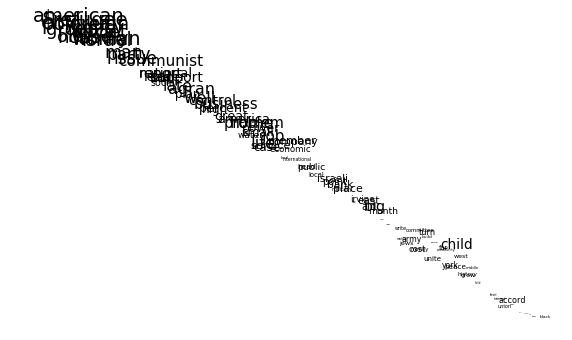

Period 1
[('international', 0.997968316078186), ('american', 0.9978758692741394), ('human', 0.9978673458099365), ('book', 0.9977293014526367), ('family', 0.997627317905426), ('group', 0.9975792169570923), ('old', 0.9975030422210693), ('well', 0.9974676370620728), ('great', 0.9974597096443176), ('force', 0.9974533319473267)]


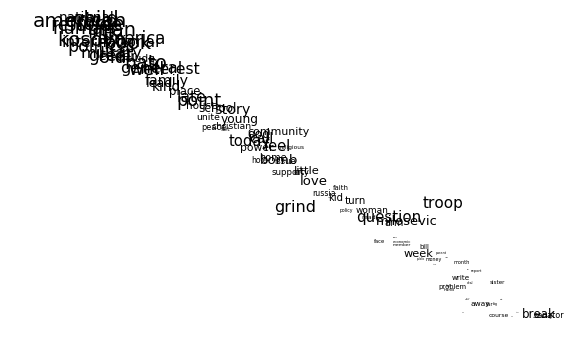

Period 2
[('family', 0.9987289905548096), ('force', 0.9986624121665955), ('god', 0.9985976219177246), ('american', 0.9985763430595398), ('place', 0.9985558986663818), ('military', 0.9985485076904297), ('christian', 0.9985190629959106), ('company', 0.9984644055366516), ('today', 0.9984526634216309), ('body', 0.9984414577484131)]


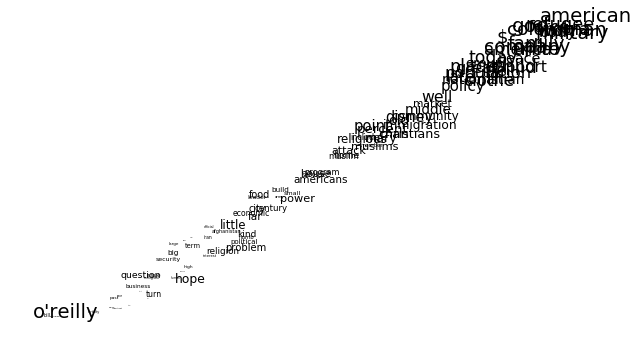

Period 3
[('family', 0.9888491630554199), ('jews', 0.9888104796409607), ('israel', 0.9882780313491821), ('palestinian', 0.987165093421936), ('high', 0.9868433475494385), ('issue', 0.9868105053901672), ('today', 0.9865814447402954), ('community', 0.9864844083786011), ('well', 0.9864801168441772), ('american', 0.9863382577896118)]


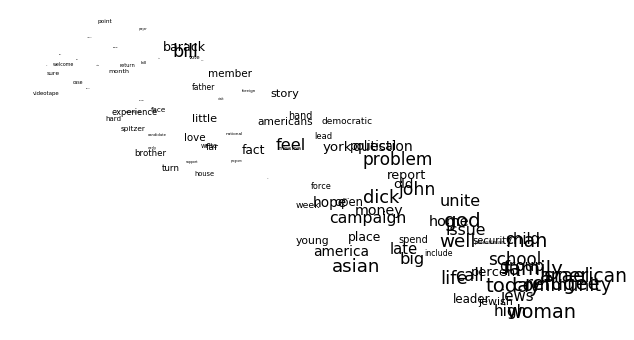

Period 4
[('place', 0.9999246001243591), ('christians', 0.9999231100082397), ('family', 0.9999228119850159), ('hold', 0.9999221563339233), ('christian', 0.9999209046363831), ('fact', 0.9999208450317383), ('late', 0.9999199509620667), ('follow', 0.999918520450592), ('old', 0.9999160170555115), ('city', 0.9999154806137085)]


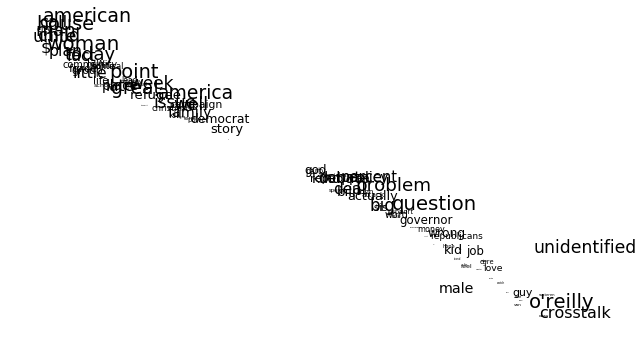

In [40]:
# By 5-year periods
period_w2v = {}
for p in periods:
    chunks = data[data['period']==p]
    data_w2v = gensim.models.word2vec.Word2Vec(chunks['normalized_sents'].sum())
    period_w2v[p] = data_w2v
    print("Period {}".format(p))
    print(data_w2v.most_similar(positive=['refugee']))
    plot_embeddings(data_w2v, 100, save=True, title='period_{}.png'.format(p))

In [41]:
period_w2v

{0: <gensim.models.word2vec.Word2Vec at 0x1e24c14c0>,
 1: <gensim.models.word2vec.Word2Vec at 0x1e24c1730>,
 2: <gensim.models.word2vec.Word2Vec at 0x1e24c19d0>,
 3: <gensim.models.word2vec.Word2Vec at 0x23ad0a0a0>,
 4: <gensim.models.word2vec.Word2Vec at 0x217c7f910>}

## 4. How are countries/identities associated with refugees over time?
* Countries: countrylist library
* Identities: citizenship (e.g. iraqi, chinese, etc.), religion, demographic (male, female, mother, father, child/children, etc.)
* Dimensions: legal-illegal, accept-ban, refugee-native


In [42]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

def makeDF(model, word_list, Dim1, Dim2, Dim3, dim1_label, dim2_label, dim3_label):
    dim1 = []
    dim2 = []
    dim3 = []
    for word in word_list:
        dim1.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Dim1.reshape(1,-1))[0][0])
        dim2.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Dim2.reshape(1,-1))[0][0])
        dim3.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Dim3.reshape(1,-1))[0][0])
    df = pd.DataFrame({dim1_label: dim1, dim2_label: dim2, dim3_label: dim3}, index = word_list)
    return df

def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

In [43]:
def get_common_words():
    words = {}
    common = []

    for p in periods:
        vocab = list(period_w2v[p].wv.vocab.keys())
        for v in vocab:
            if v in words:
                words[v] += 1
            else:
                words[v] = 1
    for w, count in words.items():
        if count >= len(periods):
            # word in all periods
            common.append(w)
    return common

common = get_common_words()
len(common)

964

#### Country Analysis

In [44]:
from country_list import countries_for_language
countries = dict(countries_for_language('en'))
countrylist = list(c.lower() for c in countries.values())
countrylist_all = countrylist + ['soviet', 'palestine']
countrylist_all

['afghanistan',
 'åland islands',
 'albania',
 'algeria',
 'american samoa',
 'andorra',
 'angola',
 'anguilla',
 'antarctica',
 'antigua & barbuda',
 'argentina',
 'armenia',
 'aruba',
 'ascension island',
 'australia',
 'austria',
 'azerbaijan',
 'bahamas',
 'bahrain',
 'bangladesh',
 'barbados',
 'belarus',
 'belgium',
 'belize',
 'benin',
 'bermuda',
 'bhutan',
 'bolivia',
 'bosnia & herzegovina',
 'botswana',
 'brazil',
 'british indian ocean territory',
 'british virgin islands',
 'brunei',
 'bulgaria',
 'burkina faso',
 'burundi',
 'cambodia',
 'cameroon',
 'canada',
 'canary islands',
 'cape verde',
 'caribbean netherlands',
 'cayman islands',
 'central african republic',
 'ceuta & melilla',
 'chad',
 'chile',
 'china',
 'christmas island',
 'cocos (keeling) islands',
 'colombia',
 'comoros',
 'congo - brazzaville',
 'congo - kinshasa',
 'cook islands',
 'costa rica',
 'côte d’ivoire',
 'croatia',
 'cuba',
 'curaçao',
 'cyprus',
 'czechia',
 'denmark',
 'diego garcia',
 'djibou

In [45]:
countries_w2v = []
for country in countrylist:
    if country in common:
        countries_w2v.append(country.lower())

In [46]:
# Word counts over periods
country_byperiod = {}
for p in periods:
    for word in data[data['period']==p]['tokenized_words'].sum():
        if word in countrylist_all:
            p=str(p)
            if p not in country_byperiod:
                country_byperiod[p] = {}
            if word not in country_byperiod[p]:
                country_byperiod[p][word] = 1
            else:
                country_byperiod[p][word] +=1

In [47]:
for p in periods:
    print("Period {}".format(p))
    print(country_byperiod[str(p)])
    print()

Period 0
{'kuwait': 50, 'iraq': 35, 'bangladesh': 2, 'india': 9, 'pakistan': 5, 'thailand': 7, 'philippines': 9, 'jordan': 41, 'syria': 24, 'turkey': 11, 'iran': 9, 'malawi': 9, 'mozambique': 2, 'soviet': 164, 'israel': 185, 'hungary': 7, 'argentina': 3, 'ethiopia': 1, 'germany': 73, 'egypt': 13, 'vietnam': 66, 'grenada': 1, 'japan': 38, 'mexico': 12, 'afghanistan': 5, 'chad': 1, 'angola': 5, 'kenya': 5, 'ecuador': 2, 'china': 56, 'panama': 7, 'ukraine': 16, 'tunisia': 1, 'nicaragua': 8, 'honduras': 3, 'guatemala': 3, 'brazil': 36, 'cambodia': 5, 'taiwan': 31, 'singapore': 33, 'australia': 5, 'bermuda': 1, 'indonesia': 12, 'malaysia': 12, 'fiji': 1, 'france': 24, 'cuba': 53, 'spain': 21, 'jamaica': 1, 'uruguay': 1, 'canada': 11, 'nigeria': 1, 'venezuela': 1, 'russia': 24, 'albania': 12, 'italy': 6, 'lithuania': 12, 'jersey': 7, 'haiti': 25, 'liberia': 3, 'somalia': 5, 'zimbabwe': 2, 'lebanon': 12, 'palestine': 23, 'ireland': 1, 'sweden': 3, 'latvia': 7, 'estonia': 7, 'armenia': 9, 'geo

In [48]:
country_byperiod_df = pd.DataFrame.from_dict(country_byperiod, orient='index')
country_byperiod_df.dropna(axis='columns', how='all', inplace=True)
country_byperiod_df

,kuwait,iraq,bangladesh,india,pakistan,thailand,philippines,jordan,syria,turkey,...,aruba,greenland,tanzania,guam,cameroon,samoa,guinea,denmark,brunei,norway
0,50,35,2.0,9,5,7.0,9,41,24,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,18,2.0,7,8,1.0,1,3,3,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,76,1.0,11,27,1.0,6,5,21,6,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,79,2.0,3,17,3.0,3,13,21,7,...,NaN,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,3,137,NaN,4,7,NaN,1,37,107,17,...,NaN,NaN,NaN,1.0,4.0,1.0,1.0,1.0,6.0,1.0


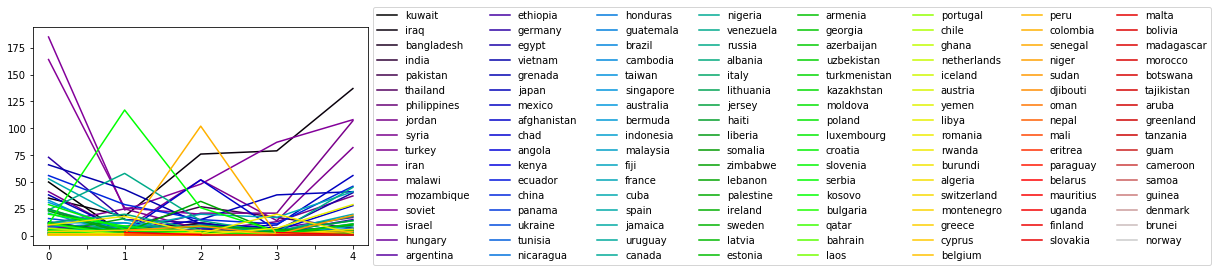

In [49]:
country_byperiod_df.plot(colormap='nipy_spectral')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=8)

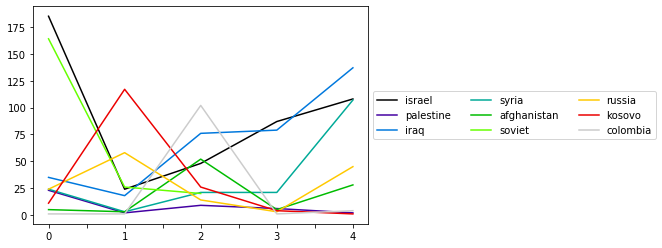

In [77]:
selected=['israel','palestine','iraq','syria','afghanistan','soviet','russia','kosovo','colombia']
country_byperiod_df[selected].plot(colormap='nipy_spectral')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)

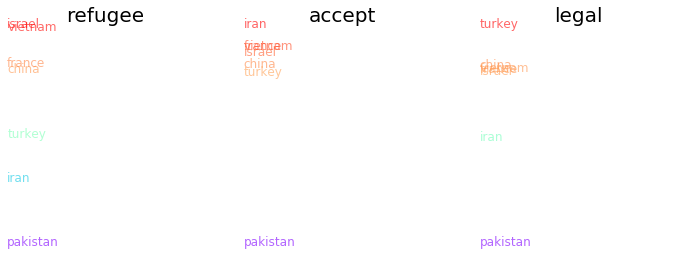

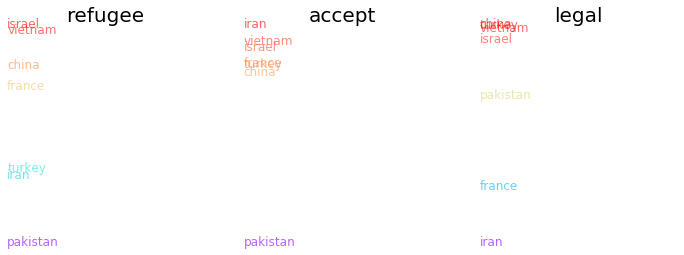

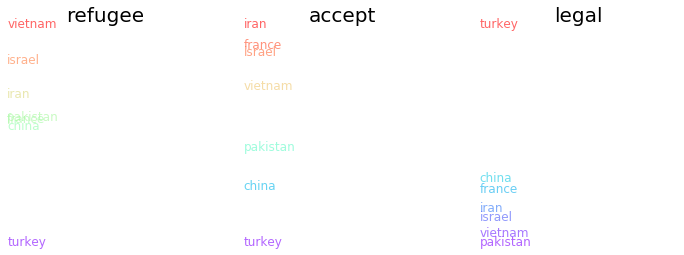

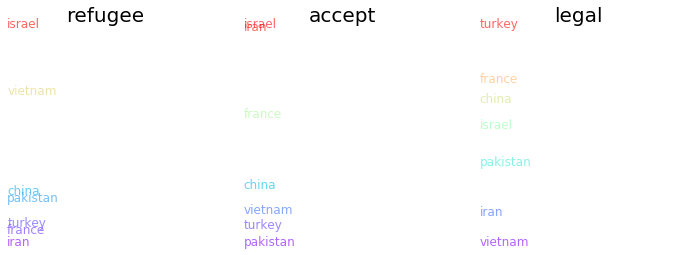

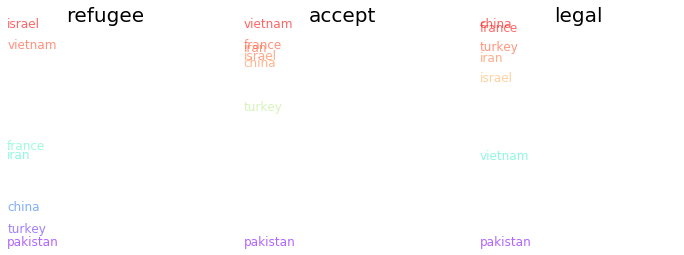

In [54]:
# W2V Dimensions for Countries
countries_full = countries_w2v

for p in periods:
    model = period_w2v[p]
    Refugee = dimension(model, ['refugee','flee'], ['citizen','remain'])
    Accept = dimension(model, ['welcome', 'accept'], ['ban','reject'])
    Legal = dimension(model, ['legal'], ['illegal'])
    df = makeDF(model, countries_full, Refugee, Accept, Legal, 'refugee', 'accept', 'legal') 
    fig = plt.figure(figsize = (12,4))
    ax1 = fig.add_subplot(131)
    PlotDimension(ax1, df, 'refugee')
    ax2 = fig.add_subplot(132)
    PlotDimension(ax2, df, 'accept')
    ax3 = fig.add_subplot(133)
    PlotDimension(ax3, df, 'legal')
    plt.show

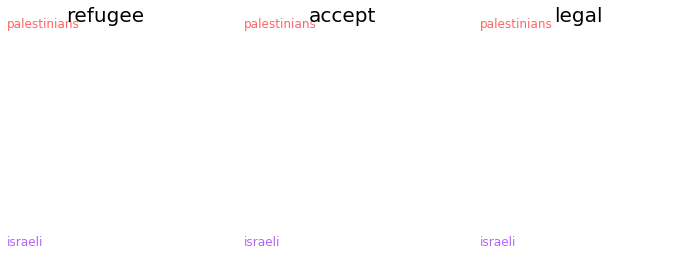

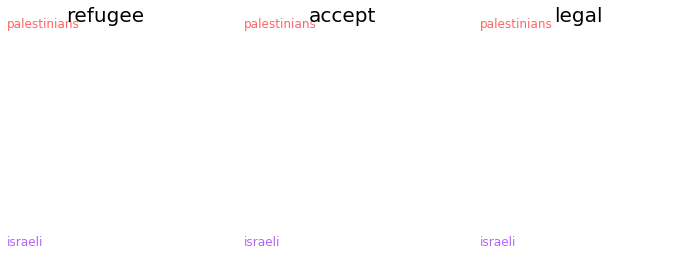

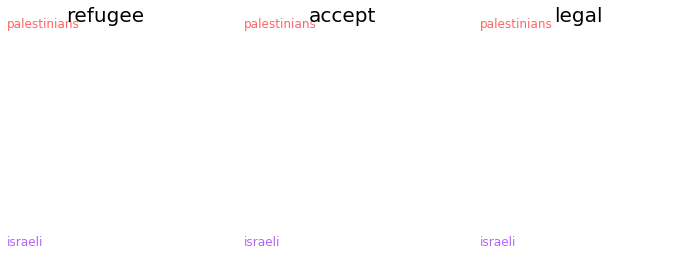

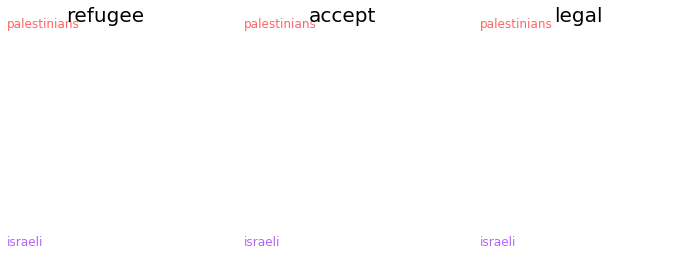

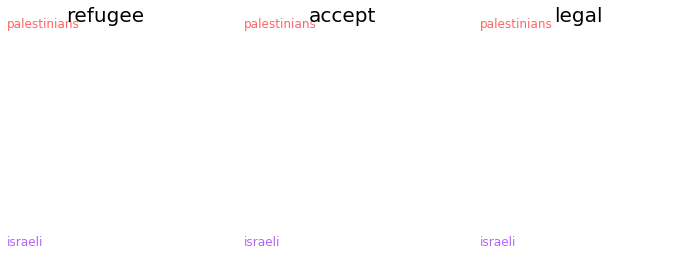

In [64]:
# W2V Dimensions for Citizenship
citizenship=['israeli','palestinians']

for p in periods:
    model = period_w2v[p]
    Refugee = dimension(model, ['refugee','flee'], ['citizen','remain'])
    Accept = dimension(model, ['welcome', 'accept'], ['ban','reject'])
    Legal = dimension(model, ['legal'], ['illegal'])
    df = makeDF(model, citizenship, Refugee, Accept, Legal, 'refugee', 'accept', 'legal') 
    fig = plt.figure(figsize = (12,4))
    ax1 = fig.add_subplot(131)
    PlotDimension(ax1, df, 'refugee')
    ax2 = fig.add_subplot(132)
    PlotDimension(ax2, df, 'accept')
    ax3 = fig.add_subplot(133)
    PlotDimension(ax3, df, 'legal')
    plt.show

<ipython-input-42-5e304d3f721d>:23: RuntimeWarning: invalid value encountered in true_divide
  z = y/y.max()
<ipython-input-42-5e304d3f721d>:35: UserWarning: Attempting to set identical bottom == top == 0.0014446431305259466 results in singular transformations; automatically expanding.
  plt.ylim(MinY,MaxY)
<ipython-input-42-5e304d3f721d>:35: UserWarning: Attempting to set identical bottom == top == 0.016764473170042038 results in singular transformations; automatically expanding.
  plt.ylim(MinY,MaxY)
<ipython-input-42-5e304d3f721d>:35: UserWarning: Attempting to set identical bottom == top == -0.006869870238006115 results in singular transformations; automatically expanding.
  plt.ylim(MinY,MaxY)
<ipython-input-42-5e304d3f721d>:23: RuntimeWarning: invalid value encountered in true_divide
  z = y/y.max()
<ipython-input-42-5e304d3f721d>:35: UserWarning: Attempting to set identical bottom == top == -0.12825357913970947 results in singular transformations; automatically expanding.
  plt.

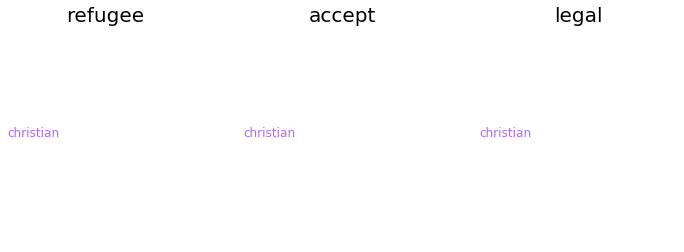

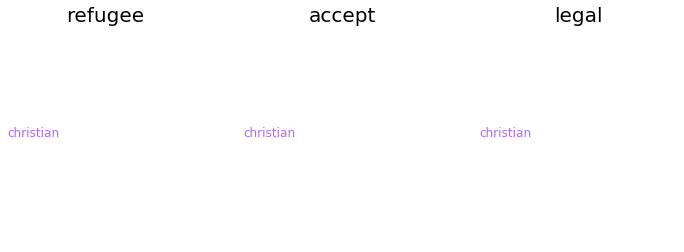

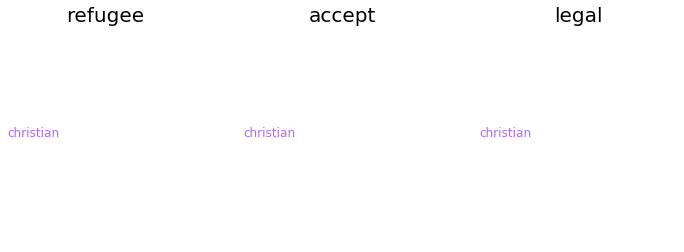

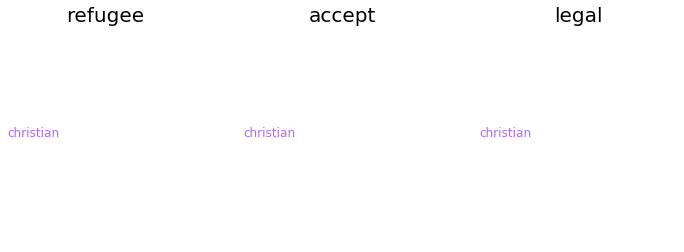

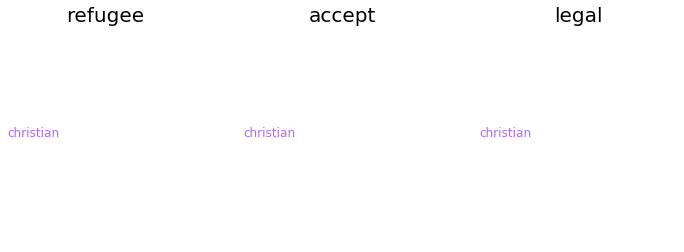

In [70]:
# W2V Dimensions for Religion
religion = ['christian']

for p in periods:
    model = period_w2v[p]
    Refugee = dimension(model, ['refugee','flee'], ['citizen','remain'])
    Accept = dimension(model, ['welcome', 'accept'], ['ban','reject'])
    Legal = dimension(model, ['legal'], ['illegal'])
    df = makeDF(model, religion, Refugee, Accept, Legal, 'refugee', 'accept', 'legal') 
    fig = plt.figure(figsize = (12,4))
    ax1 = fig.add_subplot(131)
    PlotDimension(ax1, df, 'refugee')
    ax2 = fig.add_subplot(132)
    PlotDimension(ax2, df, 'accept')
    ax3 = fig.add_subplot(133)
    PlotDimension(ax3, df, 'legal')
    plt.show

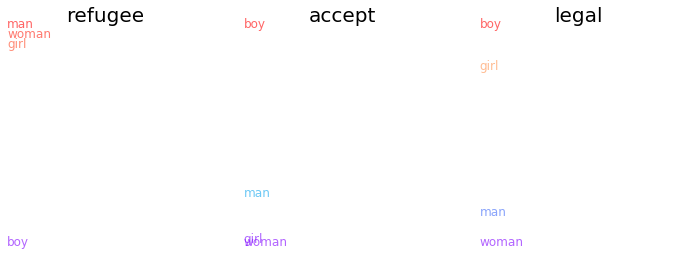

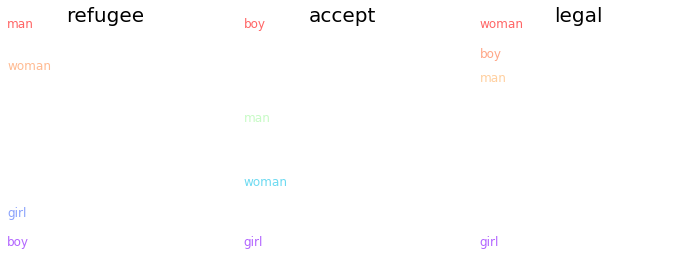

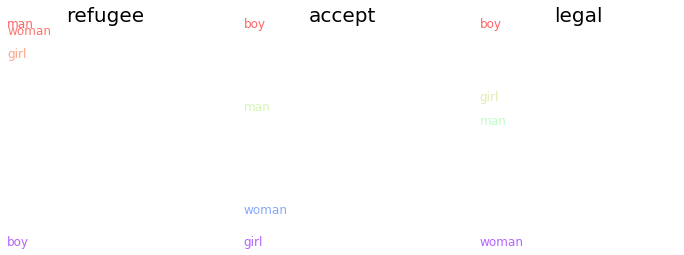

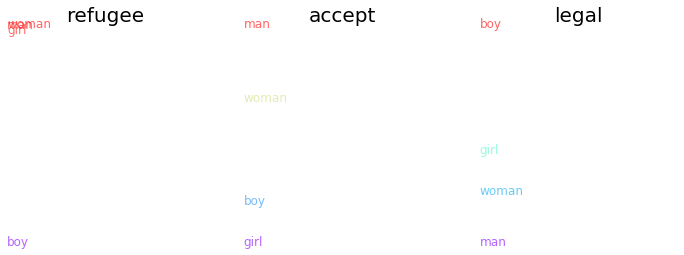

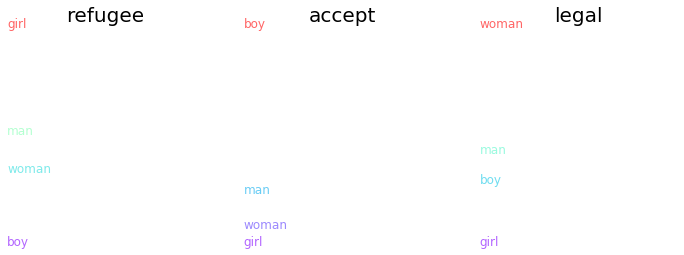

In [73]:
# W2V Dimensions for Demographic
demographic=['man', 'woman', 'girl', 'boy']

for p in periods:
    model = period_w2v[p]
    Refugee = dimension(model, ['refugee','flee'], ['citizen','remain'])
    Accept = dimension(model, ['welcome', 'accept'], ['ban','reject'])
    Legal = dimension(model, ['legal'], ['illegal'])
    df = makeDF(model, demographic, Refugee, Accept, Legal, 'refugee', 'accept', 'legal') 
    fig = plt.figure(figsize = (12,4))
    ax1 = fig.add_subplot(131)
    PlotDimension(ax1, df, 'refugee')
    ax2 = fig.add_subplot(132)
    PlotDimension(ax2, df, 'accept')
    ax3 = fig.add_subplot(133)
    PlotDimension(ax3, df, 'legal')
    plt.show

## 5. BERT Text Generation